In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [5]:
#Importación de datos
data = pd.read_csv('regLin4.csv')
data.head(30)

,X,y
0,71.130300,0
1,36.872465,0
2,56.508402,0
3,78.120147,0
4,65.575073,0
5,33.820927,0
6,60.418388,0
7,65.317559,0
8,2.816397,1
9,99.170060,0


In [21]:
x_trn, x_tst, y_trn, y_tst = train_test_split(data[data.keys()[:-1]], data.y, train_size = .75)

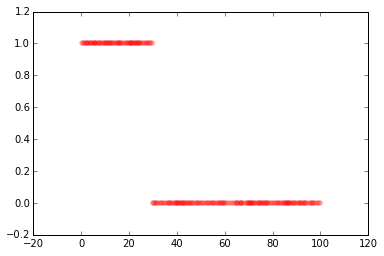

In [22]:
#¿ Cómo se ven los datos?
plt.scatter(data.X,data.y, color='r', alpha=.05)

In [151]:
# Lo único que debemos modificar es en la función de transferencia
def y_gorro_prcptrn(x,b):
    y_trans = (np.dot(np.concatenate
                ((np.ones((len(x),1)),np.array(x).reshape(len(x),1)),axis=1),
                np.array(b).reshape(len(b),1)))
    if y_trans[-1]>=0:
        y = 1
    else:
        y = 0
    return y

In [205]:
def trainer_prcptrn(x,y,eta=.01):
    y = np.array(y).reshape(len(y),1)
    # la inicio, arbitrariamente, en 1
    x = np.array(x).reshape(len(x),1)
    b = [1,1]
    err = pd.DataFrame(np.zeros((len(x),5)),columns = ['Errores','w0','w1','y estimada', 'y entrenamiento'], index = [x])
    for j in xrange(len(x)):
        # cálculo del error INCLUYENDO LOS VALORES ANTERIORES (por eso los dos puntos(:))
        V = y[j]-y_gorro_prcptrn(x[:j+1],b)
        # uso las betas arbitrarias
        b_ant = np.array([i for i in b])
        # almaceno los datos en la tabla
        err.ix[j] = [V[0], b[0], b[1], y_gorro_prcptrn(x[:j+1],b), y[j]]
        x_new = [1,x[j]]
        for k in xrange(len(b)):
            ## y_gorro lo calculo solo con los valores que se supone tengo hasta ese momento
            b[k] = (b[k]+eta*(V)*x_new[k])
    return err

In [153]:
trainer_prcptrn(x_trn,y_trn)

,Errores,w1,w2,y estimada,y entrenamiento
16.063203,0,1.00,1.000000,1,1
98.445148,-1,1.00,1.000000,1,0
52.012171,-1,0.99,0.015549,1,0
19.680809,1,0.98,-0.504573,0,1
59.992875,0,0.99,-0.307765,0,0
56.705603,0,0.99,-0.307765,0,0
42.022183,0,0.99,-0.307765,0,0
50.616634,0,0.99,-0.307765,0,0
52.592191,0,0.99,-0.307765,0,0
94.359008,0,0.99,-0.307765,0,0


In [154]:
# ¿Cuántas veces acierta?
#con diferentes etas
eta = [eta for eta in np.linspace(.000001,.009,100)]
best_eta = pd.DataFrame(np.zeros((100,2)), columns = ['% de aciertos','eta'])
for et in xrange(len(eta)):
    best_eta['eta'].ix[et] = eta[et]
    best_eta['% de aciertos'].ix[et] = (trainer_prcptrn(x_trn,y_trn, eta[et]).Errores.loc[trainer_prcptrn(x_trn,y_trn, eta[et]).Errores==0].count()
                                      /float(771))
best_eta.head()

,% de aciertos,eta
0,0.320363,0.000001
1,0.769131,0.000092
2,0.874189,0.000183
3,0.911803,0.000274
4,0.928664,0.000365


In [329]:
# ¿Cuál es la eta con la que acierta más?
best_eta.loc[best_eta['% de aciertos'].max()==best_eta['% de aciertos']]


,% de aciertos,eta
43,0.988327,0.00391


In [267]:
# recalculando con esa eta
trainer_prcptrn(x_trn,y_trn,0.00391)

,Errores,w0,w1,y estimada,y entrenamiento
16.063203,0,1.00000,1.000000,1,1
98.445148,-1,1.00000,1.000000,1,0
52.012171,-1,0.99609,0.615079,1,0
19.680809,0,0.99218,0.411712,1,1
59.992875,-1,0.99218,0.411712,1,0
56.705603,-1,0.98827,0.177140,1,0
42.022183,0,0.98436,-0.044579,0,0
50.616634,0,0.98436,-0.044579,0,0
52.592191,0,0.98436,-0.044579,0,0
94.359008,0,0.98436,-0.044579,0,0


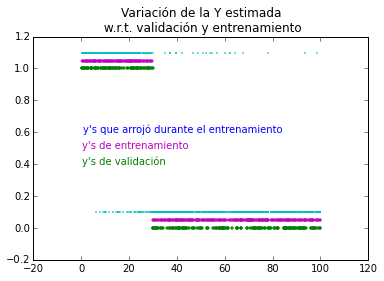

In [331]:
plt.scatter(trainer_prcptrn(x_trn,y_trn, 0.00391).index.values,
            trainer_prcptrn(x_trn,y_trn, 0.00391)['y entrenamiento'].values+.05, color='m',alpha=.3, s=5)
plt.hold(True)
plt.scatter(trainer_prcptrn(x_trn,y_trn, 0.00391).index.values,
            trainer_prcptrn(x_trn,y_trn, 0.00391)['y estimada'].values+.1, color='c', alpha=.9, s=.5)
plt.scatter(x_tst,y_tst,color='g',alpha=.9,s=5)
plt.annotate(u"y's que arrojó durante el entrenamiento",xy=(0,0),xytext=(.6,.6), color='b')
plt.annotate("y's de entrenamiento",xy=(0,0),xytext=(.5,.5), color='m')
plt.annotate(u"y's de validación",xy=(0,0),xytext=(.4,.4), color='g')
plt.title(u'Variación de la Y estimada \n w.r.t. validación y entrenamiento')

In [326]:
# ¿Qué pasa si calculamos los ys que estima dadas las w's finales?

#hago una pequeña modificación a la fn perceptrón que tenía
def yy_with_lastWs(x,y,eta):
    err = trainer_prcptrn(x,y,eta)
    w0 = trainer_prcptrn(x,y,eta)[['w0','w1']].tail(1).values[0,0]
    w1 = trainer_prcptrn(x,y,eta)[['w0','w1']].tail(1).values[0,-1]
    ys_estimates_lastWs = pd.DataFrame(np.zeros((x.size,1)), columns=['yy'])
    V = err[['w0']].tail(1).values*np.ones((x.size,1))+err[['w1']].tail(1).values*err.index.values
    for i in xrange((w0*np.ones((x_trn.size,1))+w1*x_trn).shape[0]):
        if V[i]>=0:
            ys_estimates_lastWs.ix[i]=1
        else:
            ys_estimates_lastWs.ix[i]=0
    return ys_estimates_lastWs


In [327]:
# ¿Y con las w's que más errores = 0 nos dieron?
err = trainer_prcptrn(x_trn,y_trn,0.00391)
# quiero las w's que me dieron menos desviaciones por más tiempo
## no cambian las w's cuando el error es cero
ww = err[['w0','w1']].mode().values
err.loc[err['w0']==ww[0,0]]

def yy_with_bestWs(x,y,eta):
    err = trainer_prcptrn(x,y,eta)
    ww = err[['w0','w1']].mode().values
    w0 = ww[0,0]
    w1 = ww[0,-1]
    ys_estimates_lastWs = pd.DataFrame(np.zeros((x.size,1)), columns=['yy'])
    V = err[['w0']].tail(1).values*np.ones((x.size,1))+err[['w1']].tail(1).values*err.index.values
    for i in xrange((w0*np.ones((x_trn.size,1))+w1*x_trn).shape[0]):
        if V[i]>=0:
            ys_estimates_lastWs.ix[i]=1
        else:
            ys_estimates_lastWs.ix[i]=0
    return ys_estimates_lastWs

# ww = err[['w0','w1']].loc[err.index==0].values
# w0 = ww[0,0]
# w1 = ww[0,-1]
# print ww, w0, w1

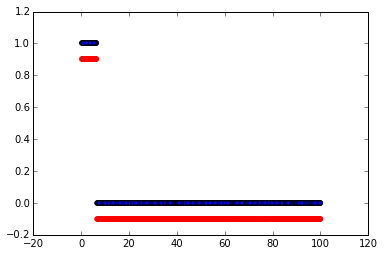

In [328]:
plt.scatter(trainer_prcptrn(x_trn,y_trn,.00391).index.values,
            yy_with_bestWs(x_trn,y_trn,.00391).values)
plt.scatter(trainer_prcptrn(x_trn,y_trn,.00391).index.values,
           yy_with_lastWs(x_trn,y_trn,.00391).values-.1, color='r')

# funciona mejor con las que se autoentrenan!!

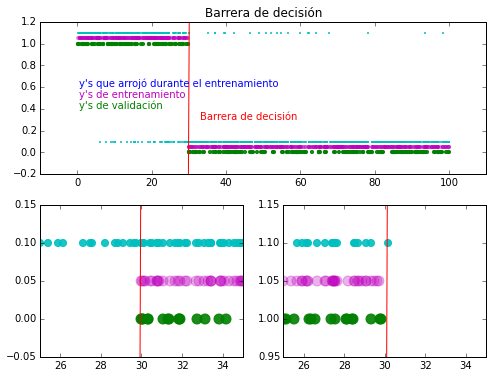

In [375]:
# Barrera de decisión
# umbral = 
err = trainer_prcptrn(x_trn,y_trn,.00391).sort(['y estimada'])
#Sabemos que cuando los errores==-1, y_trn=0 y y_estimada=1
x_top = err.loc[err.Errores==-1].index.min()
#Lo mismo con el límite de abajo, pero ahora el error = 1
x_low = err.loc[err.Errores==1].index.max()
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.plot(np.linspace(x_low,x_top,100),np.linspace(-1.5,1.5,100), color='red')
plt.hold(True)
plt.scatter(trainer_prcptrn(x_trn,y_trn, 0.00391).index.values,
            trainer_prcptrn(x_trn,y_trn, 0.00391)['y entrenamiento'].values+.05, color='m',alpha=.3, s=10)
plt.scatter(trainer_prcptrn(x_trn,y_trn, 0.00391).index.values,
            trainer_prcptrn(x_trn,y_trn, 0.00391)['y estimada'].values+.1, color='c', alpha=.9, s=1)
plt.scatter(x_tst,y_tst,color='g',alpha=.9,s=10)
plt.annotate(u"y's que arrojó durante el entrenamiento",xy=(0,0),xytext=(.6,.6), color='b')
plt.annotate("y's de entrenamiento",xy=(0,0),xytext=(.5,.5), color='m')
plt.annotate(u"y's de validación",xy=(0,0),xytext=(.4,.4), color='g')
plt.title(u'Barrera de decisión')
plt.axis([-10,110,-.2,1.2])
plt.annotate(u'Barrera de decisión',xy=(0,0),xytext=(33,.3), color='r')
for i in xrange(2):
    plt.subplot(2,2,i+3)
    plt.plot(np.linspace(x_low,x_top,100),np.linspace(-1.5,1.5,100), color='red')
    plt.hold(True)
    plt.scatter(trainer_prcptrn(x_trn,y_trn, 0.00391).index.values,
                trainer_prcptrn(x_trn,y_trn, 0.00391)['y entrenamiento'].values+.05, color='m',alpha=.3, s=100)
    plt.scatter(trainer_prcptrn(x_trn,y_trn, 0.00391).index.values,
                trainer_prcptrn(x_trn,y_trn, 0.00391)['y estimada'].values+.1, color='c', alpha=.9, s=50)
    plt.scatter(x_tst,y_tst,color='g',alpha=.9,s=100)
    plt.axis([25,35,i-.05,i+.15])